In [29]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import random

In [5]:
edge_list = load_edgelist()
delta = 30
k = 4

In [ ]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [3]:
def random_percentage_subset(input_list, percentage, seed=None):
    if not 0 <= percentage <= 100:
        raise ValueError("Percentage must be between 0 and 100.")

    # Set the seed for reproducibility
    random.seed(seed)

    # Calculate the number of elements to include
    num_elements = int(len(input_list) * (percentage / 100))

    # Randomly select elements
    subset = random.sample(input_list, num_elements)

    return subset

## PaCo

In [30]:
def execute_paco(data, delta, k):     
    start = time()
    C = paco(data, delta, k)
    end = time()
    count = sum(C.values())
    return count, end-start

In [31]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    data = TimeStampedLinkList.from_edgelist(n_edges)
    count, runtime = execute_paco(data, delta, k)
    results.append((count, runtime, round(n_links / 10**3)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.73s/it]


In [32]:
_, paco_runtimes_sec, paco_n_links = zip(*results)

## Baseline

In [35]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    
    # Create pathpy temporal network
    t = create_temporal_network(n_edges)
    
    # Calculate paths
    count, runtime = get_total_causal_paths(t, delta, k)
    
    
    results.append((count, runtime, round(n_links / 10**3)))

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 97530/114385 [00:08<00:02, 8055.37it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114385/114385 [00:10<00:00, 10504.64it/s]


2023-12-17 20:05:42 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 20:06:23 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		3518942
Roots:		108805
Leaves:		3410133
Links:		3410880
Acyclic:	None

2023-12-17 20:06:23 [Severity.INFO]	Generating causal trees for 108805 root nodes ...
2023-12-17 20:06:25 [Severity.INFO]	Analyzing tree 21761/108805 ...
2023-12-17 20:06:27 [Severity.INFO]	Analyzing tree 43522/108805 ...
2023-12-17 20:06:28 [Severity.INFO]	Analyzing tree 65283/108805 ...
2023-12-17 20:06:30 [Severity.INFO]	Analyzing tree 87044/108805 ...
2023-12-17 20:06:32 [Severity.INFO]	Analyzing tree 108805/108805 ...
2023-12-17 20:06:32 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		113692.0 
[Unique / Sub paths / Total]: 	[68410.0 / 227396.0 / 341088.0]
Nodes:				24859 
Edges:				68410
Max. path length:		2
Avg path length:		1.0000351827745135 
Paths of length k = 0		0.0 [ 0.0 / 227388.0 / 227388.0 ]
Paths of length k = 1		113688.0 [ 68406.0 

 49%|████████████████████████████████████████████████████████████████████████████████                                                                                     | 111074/228770 [00:07<00:12, 9551.62it/s]


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 171585/228770 [00:15<00:07, 7378.23it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 224951/228770 [00:23<00:00, 6510.42it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 228770/228770 [00:23<00:00, 9568.43it/s]


2023-12-17 20:07:00 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 20:08:18 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		7003879
Roots:		210216
Leaves:		6793646
Links:		6796770
Acyclic:	None

2023-12-17 20:08:18 [Severity.INFO]	Generating causal trees for 210216 root nodes ...
2023-12-17 20:08:37 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		226542.0 
[Unique / Sub paths / Total]: 	[117971.0 / 453135.0 / 679677.0]
Nodes:				35375 
Edges:				117971
Max. path length:		2
Avg path length:		1.0000750412727 
Paths of length k = 0		0.0 [ 0.0 / 453101.0 / 453101.0 ]
Paths of length k = 1		226525.0 [ 117954.0 / 34.0 / 226559.0 ]
Paths of length k = 2		17.0 [ 17.0 / 0.0 / 17.0 ]




 32%|████████████████████████████████████████████████████▎                                                                                                                | 108792/343156 [00:07<00:27, 8597.47it/s]


 48%|███████████████████████████████████████████████████████████████████████████████▉                                                                                     | 166189/343156 [00:16<00:26, 6712.28it/s]


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 209364/343156 [00:24<00:25, 5168.42it/s]


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 247306/343156 [00:31<00:20, 4634.46it/s]


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 283282/343156 [00:40<00:13, 4485.63it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 315566/343156 [00:48<00:07, 3595.84it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 343156/343156 [00:55<00:00, 6169.15it/s]


2023-12-17 20:09:44 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 20:12:36 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		10460118
Roots:		306308
Leaves:		10153777
Links:		10161630
Acyclic:	None

2023-12-17 20:12:36 [Severity.INFO]	Generating causal trees for 306308 root nodes ...
2023-12-17 20:13:08 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		338688.0 
[Unique / Sub paths / Total]: 	[160672.0 / 677475.0 / 1016163.0]
Nodes:				42976 
Edges:				160662
Max. path length:		2
Avg path length:		1.0000974348072562 
Paths of length k = 0		0.0 [ 0.0 / 677409.0 / 677409.0 ]
Paths of length k = 1		338655.0 [ 160639.0 / 66.0 / 338721.0 ]
Paths of length k = 2		33.0 [ 33.0 / 0.0 / 33.0 ]




 24%|███████████████████████████████████████▎                                                                                                                             | 109155/457541 [00:07<00:36, 9595.65it/s]


 37%|█████████████████████████████████████████████████████████████▋                                                                                                       | 171159/457541 [00:15<00:40, 7086.13it/s]


 48%|███████████████████████████████████████████████████████████████████████████████                                                                                      | 219404/457541 [00:22<00:43, 5430.87it/s]


 57%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 261574/457541 [00:30<00:38, 5040.56it/s]


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 295397/457541 [00:38<00:38, 4212.02it/s]


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 331108/457541 [00:46<00:29, 4359.54it/s]


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 366549/457541 [00:53<00:20, 4416.39it/s]


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 400059/457541 [01:01<00:15, 3768.69it/s]


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 432031/457541 [01:09<00:06, 3984.67it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 457541/457541 [01:15<00:00, 6064.67it/s]


2023-12-17 20:14:57 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 20:19:55 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		13895066
Roots:		398221
Leaves:		13496792
Links:		13509810
Acyclic:	None

2023-12-17 20:19:55 [Severity.INFO]	Generating causal trees for 398221 root nodes ...
2023-12-17 20:20:41 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		450274.0 
[Unique / Sub paths / Total]: 	[199336.0 / 900710.0 / 1350984.0]
Nodes:				48990 
Edges:				199312
Max. path length:		2
Avg path length:		1.0001199269777958 
Paths of length k = 0		0.0 [ 0.0 / 900602.0 / 900602.0 ]
Paths of length k = 1		450220.0 [ 199282.0 / 108.0 / 450328.0 ]
Paths of length k = 2		54.0 [ 54.0 / 0.0 / 54.0 ]




 20%|████████████████████████████████▎                                                                                                                                   | 112760/571927 [00:07<00:45, 10142.47it/s]


 31%|██████████████████████████████████████████████████▉                                                                                                                  | 176407/571927 [00:15<00:54, 7248.37it/s]


 40%|█████████████████████████████████████████████████████████████████▋                                                                                                   | 227805/571927 [00:22<00:52, 6575.84it/s]


 48%|███████████████████████████████████████████████████████████████████████████████                                                                                      | 274065/571927 [00:30<00:52, 5718.76it/s]


 55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                          | 315712/571927 [00:38<00:48, 5277.90it/s]


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 353350/571927 [00:45<00:44, 4907.96it/s]


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 389652/571927 [00:53<00:38, 4778.69it/s]


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 424613/571927 [01:00<00:31, 4676.88it/s]


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 457516/571927 [01:08<00:27, 4185.40it/s]


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 483691/571927 [01:16<00:35, 2508.76it/s]


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 507865/571927 [01:24<00:19, 3253.87it/s]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 534117/571927 [01:32<00:11, 3227.80it/s]


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 560871/571927 [01:39<00:03, 3674.38it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 571927/571927 [01:42<00:00, 5558.16it/s]


2023-12-17 20:23:02 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 20:27:50 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		17311921
Roots:		487325
Leaves:		16824514
Links:		16844490
Acyclic:	None

2023-12-17 20:27:50 [Severity.INFO]	Generating causal trees for 487325 root nodes ...
2023-12-17 20:28:17 [Severity.INFO]	Analyzing tree 97465/487325 ...
2023-12-17 20:28:37 [Severity.INFO]	Analyzing tree 194930/487325 ...
2023-12-17 20:28:56 [Severity.INFO]	Analyzing tree 292395/487325 ...
2023-12-17 20:29:05 [Severity.INFO]	Analyzing tree 389860/487325 ...
2023-12-17 20:29:13 [Severity.INFO]	Analyzing tree 487325/487325 ...
2023-12-17 20:29:13 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		561401.0 
[Unique / Sub paths / Total]: 	[234842.0 / 1123075.0 / 1684476.0]
Nodes:				54075 
Edges:				234792
Max. path length:		2
Avg path length:		1.0001620944743597 
Paths of length k = 0		0.0 [ 0.0 / 1122893.0 / 1122893.0 ]
Paths of length k = 1		561310.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [23:56<00:00, 287.22s/it]


In [36]:
_, baseline_runtimes_sec, baseline_n_links = zip(*results)

## Plots

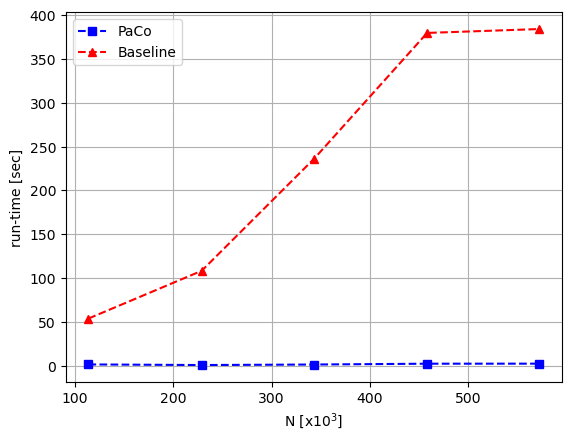

In [37]:
plt.plot(paco_n_links, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_n_links, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("N [x$10^3$]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/reddit_left_panel.png')
plt.show()